# Object Orientation in Python

We will cover Object Orientation based on three main topics:
* Object Orientation basics
* Implementing OO in Python
* Inheritance

## Object Orientation basics
Object-Oriented (OO) is a programming paradigm in which different "components" of your software are modeled based on real-world objects. An object is anything that has some characteristics and can perform a function.

OO basically relies in abstraction concept, by defining "**classes**" of **objects** in the software level, which can be represented by the object's data (attributes) and "code" (actions they can perform)

A **class** can be defined as a "blueprint" of objects

Used to make the code easier to maintain, by modularizing and creating better representations of real things.

Dummy example used to explain OO:
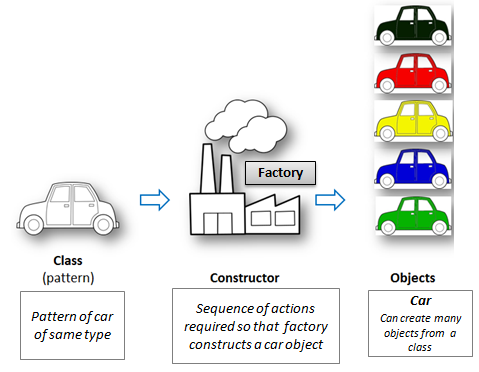  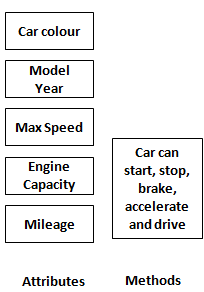

Other example of class would be **Person**, which would have different attributes, like: birth_date, gender, height, weight, city_of_birth, hair_color. a **Person** can also perform some actions like: exercise (which may change their weight), sleep, work, etc.

Let's brainstorm a bit, and think about a real-world thing that we all may know...


## OO in Python
Now we will explore how to deal with Object Orientation in Python.

As a first step, we will use a well-known example when learning OO:
* designing a class to define a **point** in a plane
* what are the clear attributes that a point would have?

See below how to create a class that abstract points, with attributes representing its position

In [1]:
class Point:
    x = 0
    y = 0

**Great!** 

We've just created a class point! But this is just our "blueprint" or our "template". To actually create points we need to **instantiate** objects out of this **class**

In [2]:
#let's pretend this is our main program
point1 = Point()
point2 = Point()

print(type(point1))

<class '__main__.Point'>


Now we have TWO points, created based on our class Point. When we do ```point1 = Point()```, we are creating a variable called point1, which is a variable typed as a Point (as per the print statement).

#### Attributes

So far, our class template only provides attributes to the point. So, what we can do is change the attributes of each point... (although, I anticipate that this is not a good practice, because we are messing up with the **encapsulation** of the objects)

In [3]:
point1.x = 10.4
point1.y = 2.2
point2.x = 0
point2.y = -4.3

print("Point 1 position is: %0.2f, %0.2f. Point 2 position is: %0.2f, %0.2f"%(point1.x, point1.y, point2.x, point2.y))

Point 1 position is: 10.40, 2.20. Point 2 position is: 0.00, -4.30


#### Methods
Methods are the actions that map the behavior of our objects. In Python, the way to declare these actions is through `def`, similarly to the way we define functions (methods are functions that apply to the object)

See the example of adding a `translate` method to our Point class. This method translates our points by a given `x, y` units in the plane

In [71]:
class Point:  
    __x = 0
    y = 0
    def translate(self, dx, dy):
        self.__x += dx # self.x = self.x + dx
        self.y += dy

In [73]:
point1 = Point()
point1.__x= 2
print("Point 1 position is: %0.2f, %0.2f."%(point1.__x, point1.y))

point1.translate(2,2)
print("Point 1 position is: %0.2f, %0.2f."%(point1.__x, point1.y))


Point 1 position is: 2.00, 0.00.
Point 1 position is: 2.00, 2.00.


Let's see what we've done there:
* Created our method, that receives *three* parameters: ``self``, ``dx``, and ``dy``. While `dx` and `dy` are the units that I want to translate the points, `self` is a *implicit parameter* representing the object we are dealing with. We do not need to provide any value to this parameter, it is used internally. **self must be the first parameter of any method**
* then, we change `x` and `y` attributes that belong to the `self` object (which is a self reference, saying: "I want to change MY values of x and y"

#### Let's code together
1. We will write the method `set_location(self, x, y)`, which is reponsible for setting the position of the point without accessing the attributes directly
2. You will code a method `distance_from_zero(self)`, which returns the distance from the point to the origin of the plane (position 0,0)
3. You will code a method `distance (self, other)`, which calculates the distance from the object to `other` point received via parameter

In [32]:
###space for our exercise
import math

class Point:  
    x = 0
    y = 0
    def translate(self, dx, dy):
        self.x += dx # self.x = self.x + dx
        self.y += dy
    def set_location(self, new_x, new_y):
        self.x = new_x
        self.y = new_y
    def distance(self, pointB):
        return math.sqrt((self.x-pointB.x)**2 + (self.y-pointB.y)**2)
    def distance_from_zero(self):
        return math.sqrt(self.x**2 + self.y**2)
        

point1 = Point()
point1.set_location(3, 4)
point2 = Point()
point2.set_location(2, 4)
print(point1.distance_from_zero())
print(point1.distance(point1))


5.0
0.0


#### Dummy master to test our methods

In [34]:
point1 = Point()
point1.set_location(3, 4)
print(point1.distance_from_zero())

point2 = Point()
point2.set_location(-2, -5)

print(point1.distance(point2))
print(point2.distance(point1))
print(point2.distance_from_zero())

5.0
10.295630140987
10.295630140987
5.385164807134504


#### Constructors
Nice concept in OO languages.

When you build an object, a specific method called constructor is called.

In previous examples, whenever we called `point1 = Point()`, a constructor with no parameters was called (which is a default, and do not change any attribute). We can define which kinds of constructors we want to make available, with or without parameters.

In Python, this method is named `__init__`

For example, if we want to instantiate our points providing its position, we would define a `__init__` method like this:

In [46]:
class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y        
        
point1 = Point(3,4)
#point1= Point()
print("Point 1 position is: %0.2f, %0.2f. "%(point1.x, point1.y))
##And now I've create a point in position x=2, y=0

Point 1 position is: 3.00, 4.00. 


We can define different *signatures*  to different constructors. Meaning that, we can define many `__init__` methods if we change the parameters required. 

For example, let's create a constructor that does not require any parameter, and sets the position to 0,0.

**Let's do together**

In [39]:
###sandbox for the constructor
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

**Solving the question about overriding a method**

The way to enable calling a method using multiple number of parameter in Python is using defaults (even for the constructors).

So, if we want to enable someone calling 

`point1 = Point()` AND `point2 = Point(2,3)` and both work is:

In [48]:
###sandbox for the constructor
class Point:
    # when you add an assignment statement in the parameters it means:
    # assign this value if you do not receive anything
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        
point1 = Point()
point2 = Point (2,3)
print(point2.x)

2


#### Defining the way the object is print
We can also define what would be an output when someone wants to print our object, like (`print(point1)`). What would happen now??

In [50]:
point1 = Point(2,4)
print(point1)

*Not a good expression of what this point actually is, right?*

We can make it better. Defining a method called `__str__` is the way to go

In [51]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    # FOCUS HERE: 
    def __str__(self):
        return("(" + str(self.x) + ", " + str(self.y) + ")")
    
# let's see how it goes now
point1 = Point(2,4)
print(point1)

(2, 4)


#### Our complete code should come here

In [43]:
###space for our exercise
import math

class Point: 

    def __init__(self, x, y):
        self.x = x
        self.y = y     

    def __str__(self):
        return(str(self.x) + ", " + str(self.y))
    
    def translate(self, dx, dy):
        self.x += dx # self.x = self.x + dx
        self.y += dy
    
    def set_location(self, x, y):
        self.x = x
        self.y = y
    
    def distance_from_zero(self):.
        distance = math.sqrt(self.x**2 + self.y**2) 
        return distance
    
    def distance (self, other:
        return math.sqrt((self.x-other.x)**2 + (self.y-other.y)**2)


### One more example for your delight

In the following example, we have 2 classes:
* `Contact`: an abstraction of the contacts in our Contact List. We represent this class of objects as something with the attributes `name` and `email_address`, because these are important in the context of our problem scope.
* `Email`: representing the email itself, which contains recipients, sender, body, subject, a flag identifying whether the email was sent or not. It also maps a set of actions that we may use to interact with our email objects.

In [40]:
class Contact:
    def __init__(self, name="", email_address=""):
        self.name = name
        self.email_address = email_address
    
    def set_email_address(self, new_address):
        self.email_address = new_address
        
    def set_name(self, new_name):
        self.name = new_name
    
    def __str__ (self):
        return (self.name + " <" + self.email_address + ">")


class Email:
    def __init__(self):
        self.is_sent = False
        self.subject = ""
        self.from_ = ""
        self.to = []
        self.cc = []
        
    def send_email(self):
        if (not self.is_sent):
            #do the magic of sending the email and:
            self.is_sent = True
        
    def set_sender(self, from_):
        self.from_ = from_
    
    def add_recipient(self, contact, where="to"):
        if (where == "to"):
            self.to.append(contact.email_address)
        elif (where == "cc"):
            self.cc.append(contact.email_address)
        else:
            print ("please provide a valid field (cc or to)")
    
    def set_body (self, body):
        self.body = body

    def set_subject (self, subject):
        self.subject = subject


## Inheritance

Inheritance enable us to define a class that takes all the characteristics and functions from a parent class. And we can extend the parent or change specific ways that an action is performed.

Look at this simple example built upon our `Point` class


In [56]:
class Point3D(Point):
    z = 0
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def translate(self, dx, dy, dz):
        Point.translate(self, dx, dy)
        self.z += dz
                
point1 = Point3D(3,4,5)
print(point1.distance_from_zero())


5.0


Well... what we have is:
    * we define the class `class Point3D (Point)`: this means that Point is the *parent* class for Point3D. Everything inside Point is part of Point3D
    * so, we can change any attribute and call any function of Point when we create a Point3D object.
    * we can call any parent function from the child class by mentioning the name of the parent class: `Point.translate(...)`
    * Here we see the value of `self` attribute. We can pass the object of the child class to the parent
    
One issue to deal with:
    * if there is a different behavior for some action (e.g.: `distance_from_zero(self)`), we need to **"overwrite"** the function:

In [57]:
class Point3D(Point):
    z = 0
    def __init__(self, x, y, z):
        Point.__init__(self, x, y)
        self.z = z
    def translate(self, dx, dy, dz):
        Point.translate(self, dx, dy)
        self.z += dz
    def distance_from_zero(self):
        distance = math.sqrt(self.x**2 + self.y**2 + self.z**2)
        return distance
    
point1 = Point3D(3,4,5)
print(point1.distance_from_zero())


7.0710678118654755


### Another example (inheritance):

In [91]:
import math

class Polygon:
    lengths_of_sides = list()

    def __init__(self, sides):
        self.sides = sides

    def print_num_sides(self):
        print('This polygon has %d sides'%(self.sides))
    
    def perimeter(self):
        perimeter = sum(self.lengths_of_sides)
        return perimeter

#This is a Rectangle, child of Polygon!
class Rectangle(Polygon):

    #lengths of sides is a list of size 2
    def __init__(self, lengths_of_sides):
        Polygon.__init__(self, 4)
        double_sides = []+lengths_of_sides
        self.lengths_of_sides = lengths_of_sides+double_sides
        print(self.lengths_of_sides)

    def area(self):
        #multiple assignment. 
        # side_1 receives lenghts_of_sides[0] 
        # side_2 receives lenghts_of_sides[1]
        side_1 = self.lengths_of_sides[0]
        side_2 = self.lengths_of_sides[1]
        return side_1 * side_2
    
    
#And class Polygon has another child!!!
class Triangle(Polygon):
    
    #lengths of sides is a list of size 3
    def __init__(self, lengths_of_sides):
        Polygon.__init__(self, 3)
        self.lengths_of_sides = lengths_of_sides  

    def area(self):
        a, b, c = self.lengths_of_sides

        # calculate the semi-perimeter
        semiperimeter = Polygon.perimeter(self) / 2
        return math.sqrt((semiperimeter*(semiperimeter-a)*(semiperimeter-b)*(semiperimeter-c)))

In [93]:
triangle = Triangle([3, 4, 5])
print(triangle.area())
print(triangle.perimeter())

rectangle = Rectangle([2,4])
print(rectangle.area())
print(rectangle.perimeter())

print(type(rectangle))


6.0
12
[2, 4, 2, 4]
8
12
<class '__main__.Rectangle'>


In [84]:
list1 = [1,2,3]
list2 = []+list1
list1[1]=1000

print(list2)



[1, 2, 3]


### Hands on!

1. Create a class Square (inheriting...)
2. Create a way to print (`__str__`) the information about the Polygon that applies to all types of Polygons

In [102]:
###CODE HERE

c1


### In Class Assignment!!! ###

**How to Turn In:** Create a Python Notebook on your repository named `InClassSept29.ipynb`

**Deadline:** Oct-01

We want to manage our movie collection. To do so, we need to write a program that helps us. You need to use OO design and follow the constraints below:

1. A `Movie` needs to have a title, a genres (may be more than one), year, my review, a list of actors, and a watch counter (how many times I watched), borrowed (a flag - True/False - that says if this movie is currently with someone), borrower name.
2. We can interact with a movie by: 
  - watching the movie (increase the counter), 
  - writing a review about the movie, 
  - set any of the fields (except flag, borrower, and counter, which are changed by different actions)
  - borrowing the movie (set the borrower and change the flag)
  - returning the moving (set borrower to "" and flag to False)
  - list the details of the movie when printing it in the following format:
  ```
     Movie: The Godfather     Year: 1972
     Genre: Crime, Drama
     List of Actors:
         Marlon Brando
         Al Pacino
         Robert Duvall
  ```
  
3. The list of actors, need to have objects of type `Actor`, which are composed of name, date_of_birth, and nationality. You should be able to:
    - set the fields name, date_of_birth, and nationality.


***CHALLENGE:*** *change your classes to make it possible to list (from an object actor) all the movies that the actor participated.* 
